In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Load the Lending Club loan dataset

In [2]:
# df = pd.read_csv('loan.csv', low_memory=False)
pd.set_option('display.max_columns', 111)
pd.set_option('display.max_rows', 125)
df = pd.read_csv('loan.csv', low_memory=False)

# 2. Check basic information about the dataset

In [3]:
# Check the number of rows and columns/variables in the dataset
df.shape

(39717, 111)

In [4]:
# Check Data Types of all columns
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [5]:
# Check more info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
# See if the column names are in proper format
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
# Get basic statistical understanding of numerical data
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# 3. Data Cleaning

In [8]:
# Check missing value % for each column

cols = pd.DataFrame(df.isnull().mean().round(4)*100, columns=['missing_val_pct']).sort_values(by=['missing_val_pct'])
print(cols)

                                missing_val_pct
id                                         0.00
earliest_cr_line                           0.00
inq_last_6mths                             0.00
open_acc                                   0.00
pub_rec                                    0.00
revol_bal                                  0.00
total_acc                                  0.00
initial_list_status                        0.00
out_prncp                                  0.00
out_prncp_inv                              0.00
delinq_2yrs                                0.00
total_pymnt                                0.00
total_rec_int                              0.00
total_rec_late_fee                         0.00
recoveries                                 0.00
collection_recovery_fee                    0.00
last_pymnt_amnt                            0.00
policy_code                                0.00
application_type                           0.00
acc_now_delinq                          

In [9]:
# Create buckets for missing values in columns and see how many % of columns fall in each bucket

# 0% Missing Values
print(str(round(100 * cols[cols['missing_val_pct'] == 0].count()/len(cols), 2)) + " % "+ "columns without missing values")

# 1-10% Missing Values
print(str(round(100 * cols[(cols['missing_val_pct'] > 0) & (cols['missing_val_pct'] <= 10)].count()/len(cols), 2)) + " % "+ "columns with 0-10% MVs")

# 11-50% Missing Values
print(str(round(100 * cols[(cols['missing_val_pct'] > 10) & (cols['missing_val_pct'] <= 50)].count()/len(cols), 2)) + " % "+ "columns with 10-50% MVs")

# >50% Missing Values
print(str(round(100 * cols[cols['missing_val_pct'] > 50].count()/len(cols), 2)) + " % "+ "columns with >50% MVs")

missing_val_pct    38.74
dtype: float64 % columns without missing values
missing_val_pct    9.01
dtype: float64 % columns with 0-10% MVs
missing_val_pct    0.9
dtype: float64 % columns with 10-50% MVs
missing_val_pct    51.35
dtype: float64 % columns with >50% MVs


In [10]:
# Check how many columns per row have missing values

rows_null_stat = pd.DataFrame(df.isnull().sum(axis=1), columns=['missing values'])
rows_null_stat

,missing values
0,58
1,57
2,59
3,56
4,55
...,...
39712,59
39713,59
39714,61
39715,61


In [11]:
# Get stats for the above metric
rows_null_stat.describe()

,missing values
count,39717.000000
mean,56.987335
std,0.824068
min,54.000000
25%,56.000000
50%,57.000000
75%,57.000000
max,62.000000


## 3.1 Drop all columns having > 50% data as null

In [12]:
df_clean = df.drop(df.columns[df.apply(lambda col: (col.isnull().sum()/len(df)*100) > 50)], axis=1)
# df_clean.shape
df_clean.columns
# df_clean.info()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [13]:
# Check again missing value % for each column

cols = pd.DataFrame(df_clean.isnull().mean().round(4)*100, columns=['missing_val_pct']).sort_values(by=['missing_val_pct'])
print(cols)

                            missing_val_pct
id                                     0.00
inq_last_6mths                         0.00
open_acc                               0.00
pub_rec                                0.00
revol_bal                              0.00
total_acc                              0.00
initial_list_status                    0.00
out_prncp                              0.00
out_prncp_inv                          0.00
total_pymnt                            0.00
delinq_2yrs                            0.00
total_pymnt_inv                        0.00
total_rec_int                          0.00
total_rec_late_fee                     0.00
recoveries                             0.00
collection_recovery_fee                0.00
last_pymnt_amnt                        0.00
policy_code                            0.00
application_type                       0.00
acc_now_delinq                         0.00
delinq_amnt                            0.00
total_rec_prncp                 

## 3.2 Analyze columns having 0 to 50% null values and clean (impute or remove) them

In [14]:
# All values in last_credit_pull_d are in the format of MON-YY and 2 values are null

df_clean.last_credit_pull_d.value_counts()
df_clean.last_credit_pull_d.value_counts(normalize=True)*100
i = df_clean[df_clean.last_credit_pull_d.isnull()].index
df_clean.drop(i, inplace=True)
df_clean.shape

(39715, 54)

In [15]:
# All values in tax_liens are 0 and 39 values are null

df_clean.tax_liens.value_counts()
df_clean.tax_liens.value_counts(normalize=True)*100
m_tax_liens = df_clean.tax_liens.mode().values[0]
df_clean.tax_liens.fillna(value=m_tax_liens, inplace=True)

df_clean.shape

(39715, 54)

In [16]:
# All values in revol_util are in the format of x.y% and 50 values are null

# sns.boxplot(df_clean.revol_util)
df_clean.revol_util.value_counts()
df_clean.revol_util.value_counts(normalize=True)*100
j = df_clean[df_clean.revol_util.isnull()].index
df_clean = df_clean.drop(j)
# df_clean[df_clean.revol_util.isnull()]
df_clean.shape

(39665, 54)

In [17]:
# All values in collections_12_mths_ex_med are 0.0 and 56 values are null

# sns.boxplot(df_clean.collections_12_mths_ex_med)

m_coll_12_mths_ex_med = df_clean.collections_12_mths_ex_med.mode().values[0]
m_coll_12_mths_ex_med
df_clean.collections_12_mths_ex_med.value_counts()
df_clean.collections_12_mths_ex_med.value_counts(normalize=True)*100
df_clean.collections_12_mths_ex_med.fillna(m_coll_12_mths_ex_med, inplace=True)
# df_clean[df_clean.collections_12_mths_ex_med.isnull()]
df_clean.shape

(39665, 54)

In [18]:
# All values in chargeoff_within_12_mths are 0.0 and 56 values are null

# sns.boxplot(df_clean.chargeoff_within_12_mths)

df_clean.chargeoff_within_12_mths.value_counts()
m_chargeoff_within_12_mths = df_clean.chargeoff_within_12_mths.mode().values[0]
df_clean.chargeoff_within_12_mths.value_counts(normalize=True)*100
df_clean.chargeoff_within_12_mths.fillna(m_chargeoff_within_12_mths, inplace=True)
# df_clean[df_clean.chargeoff_within_12_mths.isnull()]
df_clean.shape

(39665, 54)

In [19]:
# All values in last_pymnt_d are in MON-YY format and 67 values are null

# sns.boxplot(df_clean.last_pymnt_d)
# df_clean.last_pymnt_d.value_counts()
k = df_clean[df_clean.last_pymnt_d.isnull()].index
df_clean = df_clean.drop(k)
df_clean.last_pymnt_d.value_counts(normalize=True)*100
# df_clean[df_clean.last_pymnt_d.isnull()]
df_clean.shape

(39598, 54)

In [20]:
# All values in last_pymnt_d are MON-YY and 67 values are null

df_clean.pub_rec_bankruptcies.value_counts(normalize=True)*100
m_pub_rec_bankruptcies = df_clean.pub_rec_bankruptcies.mode().values[0]
df_clean.pub_rec_bankruptcies.fillna(m_pub_rec_bankruptcies, inplace=True)
# df_clean[df_clean.pub_rec_bankruptcies.isnull()].count()
df_clean.shape

(39598, 54)

In [21]:
# Check annual income values distribution
df_clean.annual_inc.value_counts()

annual_inc
60000.0    1504
50000.0    1053
40000.0     876
45000.0     825
30000.0     822
           ... 
90888.0       1
56820.0       1
45314.0       1
53913.0       1
27376.0       1
Name: count, Length: 5304, dtype: int64

In [22]:
# Cleaning the remaining columns in this single code cell

df_clean.emp_length.value_counts(normalize=True)*100
l = df_clean[df_clean.emp_length.isnull()].index
df_clean.drop(l, inplace=True)
df_clean[df_clean.emp_length.isnull()]

df_clean.emp_title.value_counts(normalize=True)*100

m = df_clean[df_clean.emp_title.isnull()].index
df_clean.drop(m, inplace=True)
df_clean.shape

df_clean[df_clean.desc.isnull()]
df_clean.desc.fillna('', inplace=True)

df_clean.title.value_counts(normalize=True)*100
df_clean.title.fillna('', inplace=True)
df_clean.shape

(37096, 54)

In [23]:
# Check again missing value % for each column

cols = pd.DataFrame(df_clean.isnull().mean().round(4)*100, columns=['missing_val_pct']).sort_values(by=['missing_val_pct'])
print(cols)

                            missing_val_pct
id                                      0.0
pub_rec                                 0.0
revol_bal                               0.0
revol_util                              0.0
total_acc                               0.0
initial_list_status                     0.0
out_prncp                               0.0
out_prncp_inv                           0.0
total_pymnt                             0.0
total_pymnt_inv                         0.0
total_rec_prncp                         0.0
total_rec_int                           0.0
total_rec_late_fee                      0.0
recoveries                              0.0
collection_recovery_fee                 0.0
last_pymnt_d                            0.0
last_pymnt_amnt                         0.0
last_credit_pull_d                      0.0
collections_12_mths_ex_med              0.0
policy_code                             0.0
application_type                        0.0
acc_now_delinq                  

# 4. Outlier Treatment & Datatype Conversion

### 4.1 Remove Outliers from Annual Income column

4.49


(35431, 54)

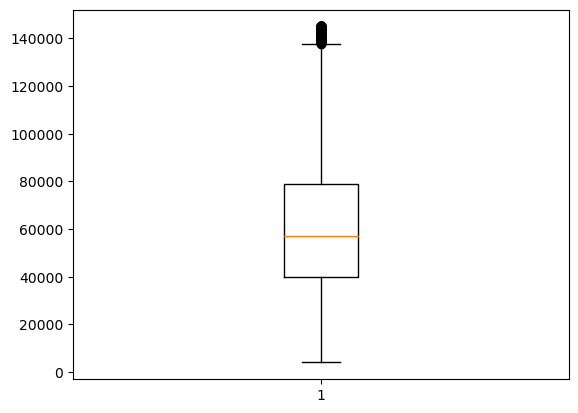

In [24]:
df_clean.annual_inc = df_clean.annual_inc.astype('int')
# plt.boxplot(df_clean.annual_inc)

IQR_ann_inc = df_clean.annual_inc.quantile(0.75) - df_clean.annual_inc.quantile(0.25)
upper_limit = df_clean.annual_inc.quantile(0.75) + 1.5*IQR_ann_inc

upper_limit

x = round(len(df_clean[df_clean.annual_inc > upper_limit])/len(df_clean)*100, 2)
print(x)

df_proper_sal = df_clean[df_clean.annual_inc <= upper_limit]
plt.boxplot(df_proper_sal.annual_inc)
df_proper_sal.shape

### 4.2 Datatype Conversion

In [25]:
# Remove '%' from the interest rate values to have float values
df_proper_sal['interest'] = df_proper_sal.int_rate.apply(lambda x: x[:-1])

# Change interest column data type
df_proper_sal['interest'] = df_proper_sal['interest'].astype('float')

# 5. Exploratory Data Analysis 

In [26]:
df_proper_sal.loan_status.value_counts()

loan_status
Fully Paid     29560
Charged Off     4881
Current          990
Name: count, dtype: int64

## 5.1 Percentage of defaulters (who have been marked charged off )

In [27]:
print(4881/30550*100)

# ~ 16% of defaulters exist

15.97708674304419


## 5.2 Univariate Analysis

### 5.2.1 Check the distribution of loans based on Loan Status

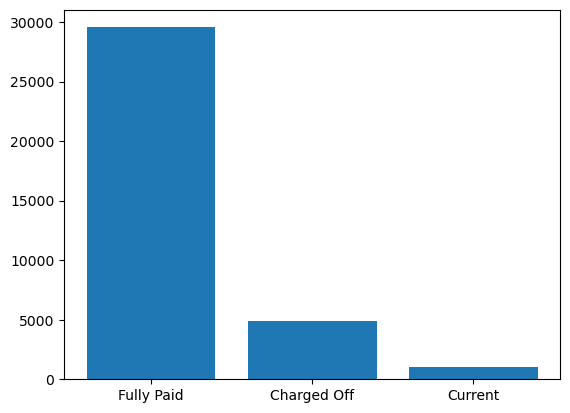

In [28]:
plt.bar(x=['Fully Paid', 'Charged Off', 'Current'], height=[count for count in df_proper_sal.loan_status.value_counts()])
plt.show()

### 5.2.2 Check the distribution of loans between different grades

<Axes: title={'center': 'All Loans by Grade'}, xlabel='grade', ylabel='All Loans'>

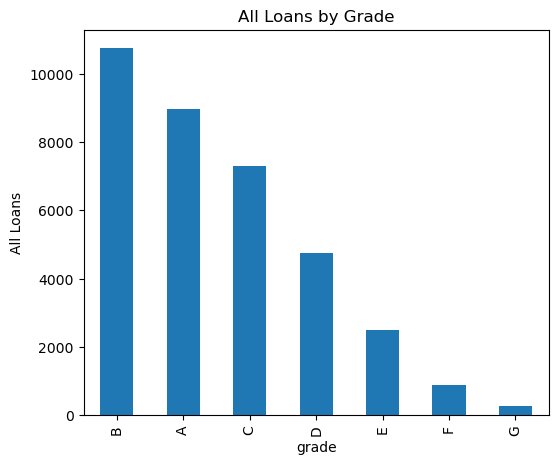

In [29]:
dfg_grd = df_proper_sal.groupby('grade').member_id.count().sort_values(ascending=False)
dfg_grd.plot(kind='bar', title='All Loans by Grade', ylabel='All Loans',
         xlabel='grade', figsize=(6, 5))

### 5.2.3 Check the distribution of loans by employment length

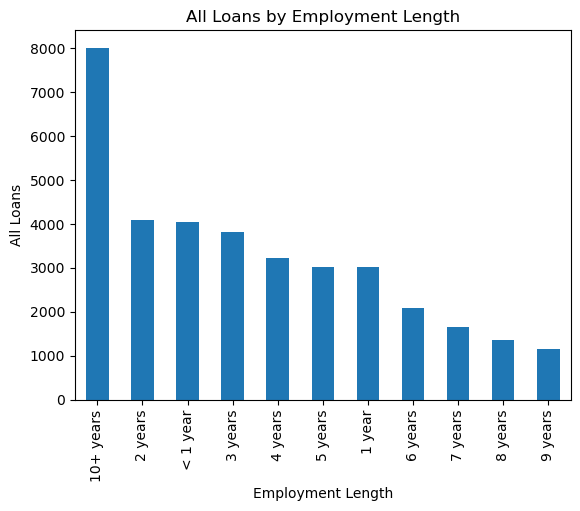

In [30]:
dfg_el = df_proper_sal.groupby('emp_length').member_id.count().sort_values(ascending=False)
dfg_el.plot(kind='bar', title='All Loans by Employment Length', ylabel='All Loans',
         xlabel='Employment Length')
plt.show()

### 5.2.4 KDE for Loan Amount

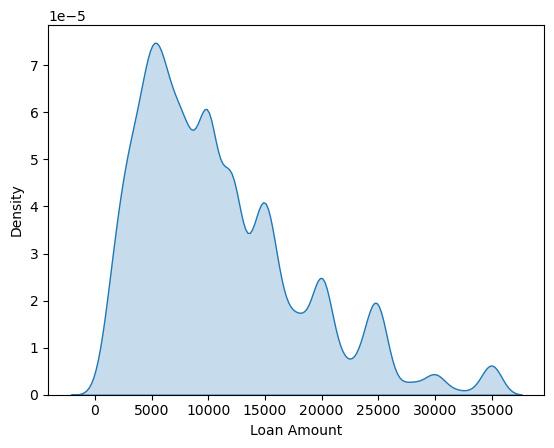

In [31]:
sns.kdeplot(df_proper_sal.loan_amnt, fill=True)
plt.xlabel('Loan Amount')
plt.show()

### 5.2.5 Distribution of Loans by Target

In [32]:
# Charged Off borrowers are marked 1, and those who fully paid the loan or are currently paying as 0

target = [1 if i=='Charged Off' else 0 for i in df_proper_sal.loan_status]
df_proper_sal['target'] = target
df_proper_sal['target'].value_counts()

target
0    30550
1     4881
Name: count, dtype: int64

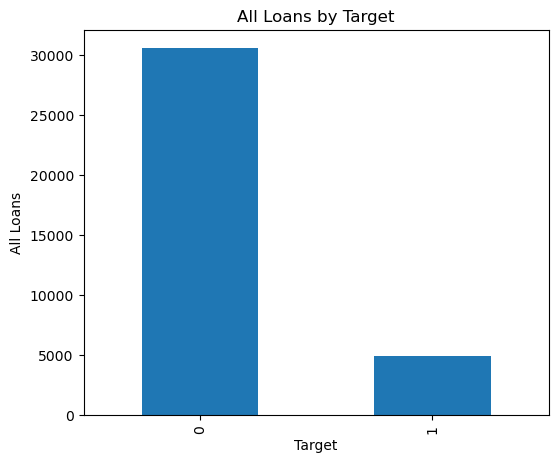

In [33]:
dfg_t = df_proper_sal.groupby('target').target.count()
dfg_t.plot(kind='bar', title='All Loans by Target', ylabel='All Loans',
         xlabel='Target', figsize=(6, 5))
plt.show()

### 5.3.11 Distribution of Annual Income

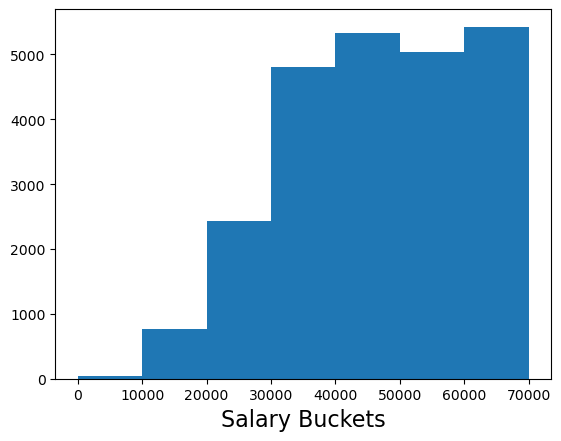

In [34]:
plt.hist(df_proper_sal.annual_inc, bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000])
plt.xlabel('Salary Buckets', fontsize=16)
plt.show()

## 5.3 Bivariate Analysis

### 5.3.1 Loan Amount by Status of Loan

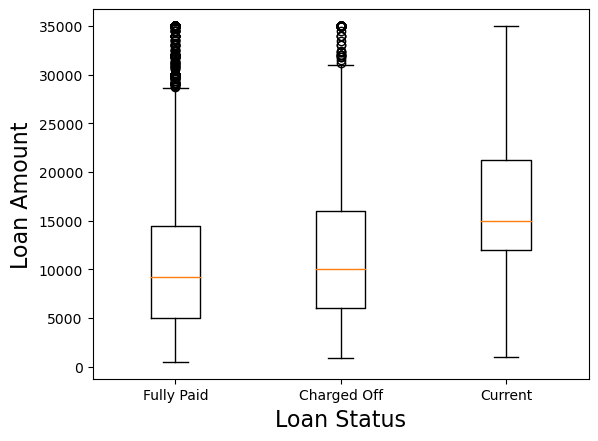

In [35]:
# Loan amount on y-axis and loan status on x-axis

fig, ax = plt.subplots()

loans_fp = df_proper_sal[df_proper_sal.loan_status == 'Fully Paid'].loan_amnt
loans_co = df_proper_sal[df_proper_sal.loan_status == 'Charged Off'].loan_amnt
loans_curr = df_proper_sal[df_proper_sal.loan_status == 'Current'].loan_amnt

data = [loans_fp , loans_co, loans_curr]

ax.boxplot(data, labels=['Fully Paid', 'Charged Off', 'Current'])
plt.xlabel('Loan Status', fontsize=16)
plt.ylabel('Loan Amount', fontsize=16)
plt.show()

### 5.3.2 Distribution of Loan Amounts by grade

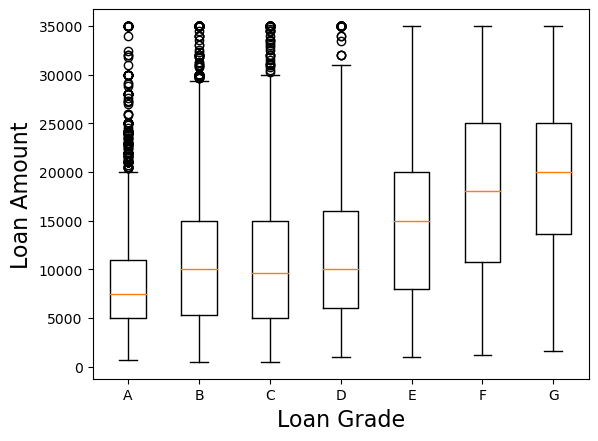

In [36]:
fig, ax = plt.subplots()

loans_a = df_proper_sal[df_proper_sal.grade == 'A'].loan_amnt
loans_b = df_proper_sal[df_proper_sal.grade == 'B'].loan_amnt
loans_c = df_proper_sal[df_proper_sal.grade == 'C'].loan_amnt
loans_d = df_proper_sal[df_proper_sal.grade == 'D'].loan_amnt
loans_e = df_proper_sal[df_proper_sal.grade == 'E'].loan_amnt
loans_f = df_proper_sal[df_proper_sal.grade == 'F'].loan_amnt
loans_g = df_proper_sal[df_proper_sal.grade == 'G'].loan_amnt

data = [loans_a , loans_b, loans_c, loans_d, loans_e, loans_f, loans_g]

ax.boxplot(data, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel('Loan Grade', fontsize=16)
plt.ylabel('Loan Amount', fontsize=16)
plt.show()

### 5.3.3 Loans deafulted (by borrowers) by grade

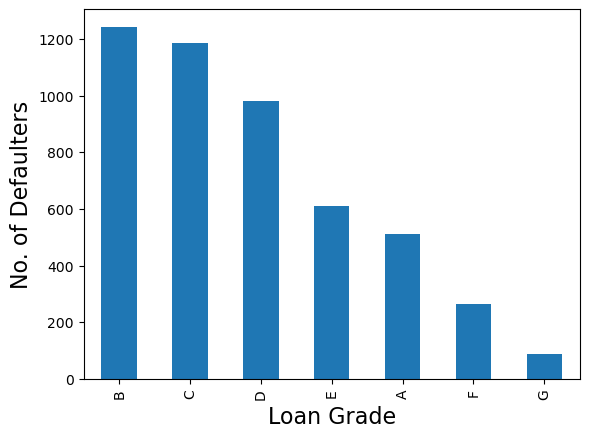

In [37]:
l_d_by_grade = df_proper_sal[df_proper_sal.loan_status == 'Charged Off'].groupby('grade').member_id.count().sort_values(ascending=False)
l_d_by_grade.plot.bar()
plt.xlabel('Loan Grade', fontsize=16)
plt.ylabel('No. of Defaulters', fontsize=16)
plt.show()

### 5.3.4 Checking for correlation between various features by drawing Pair Plot

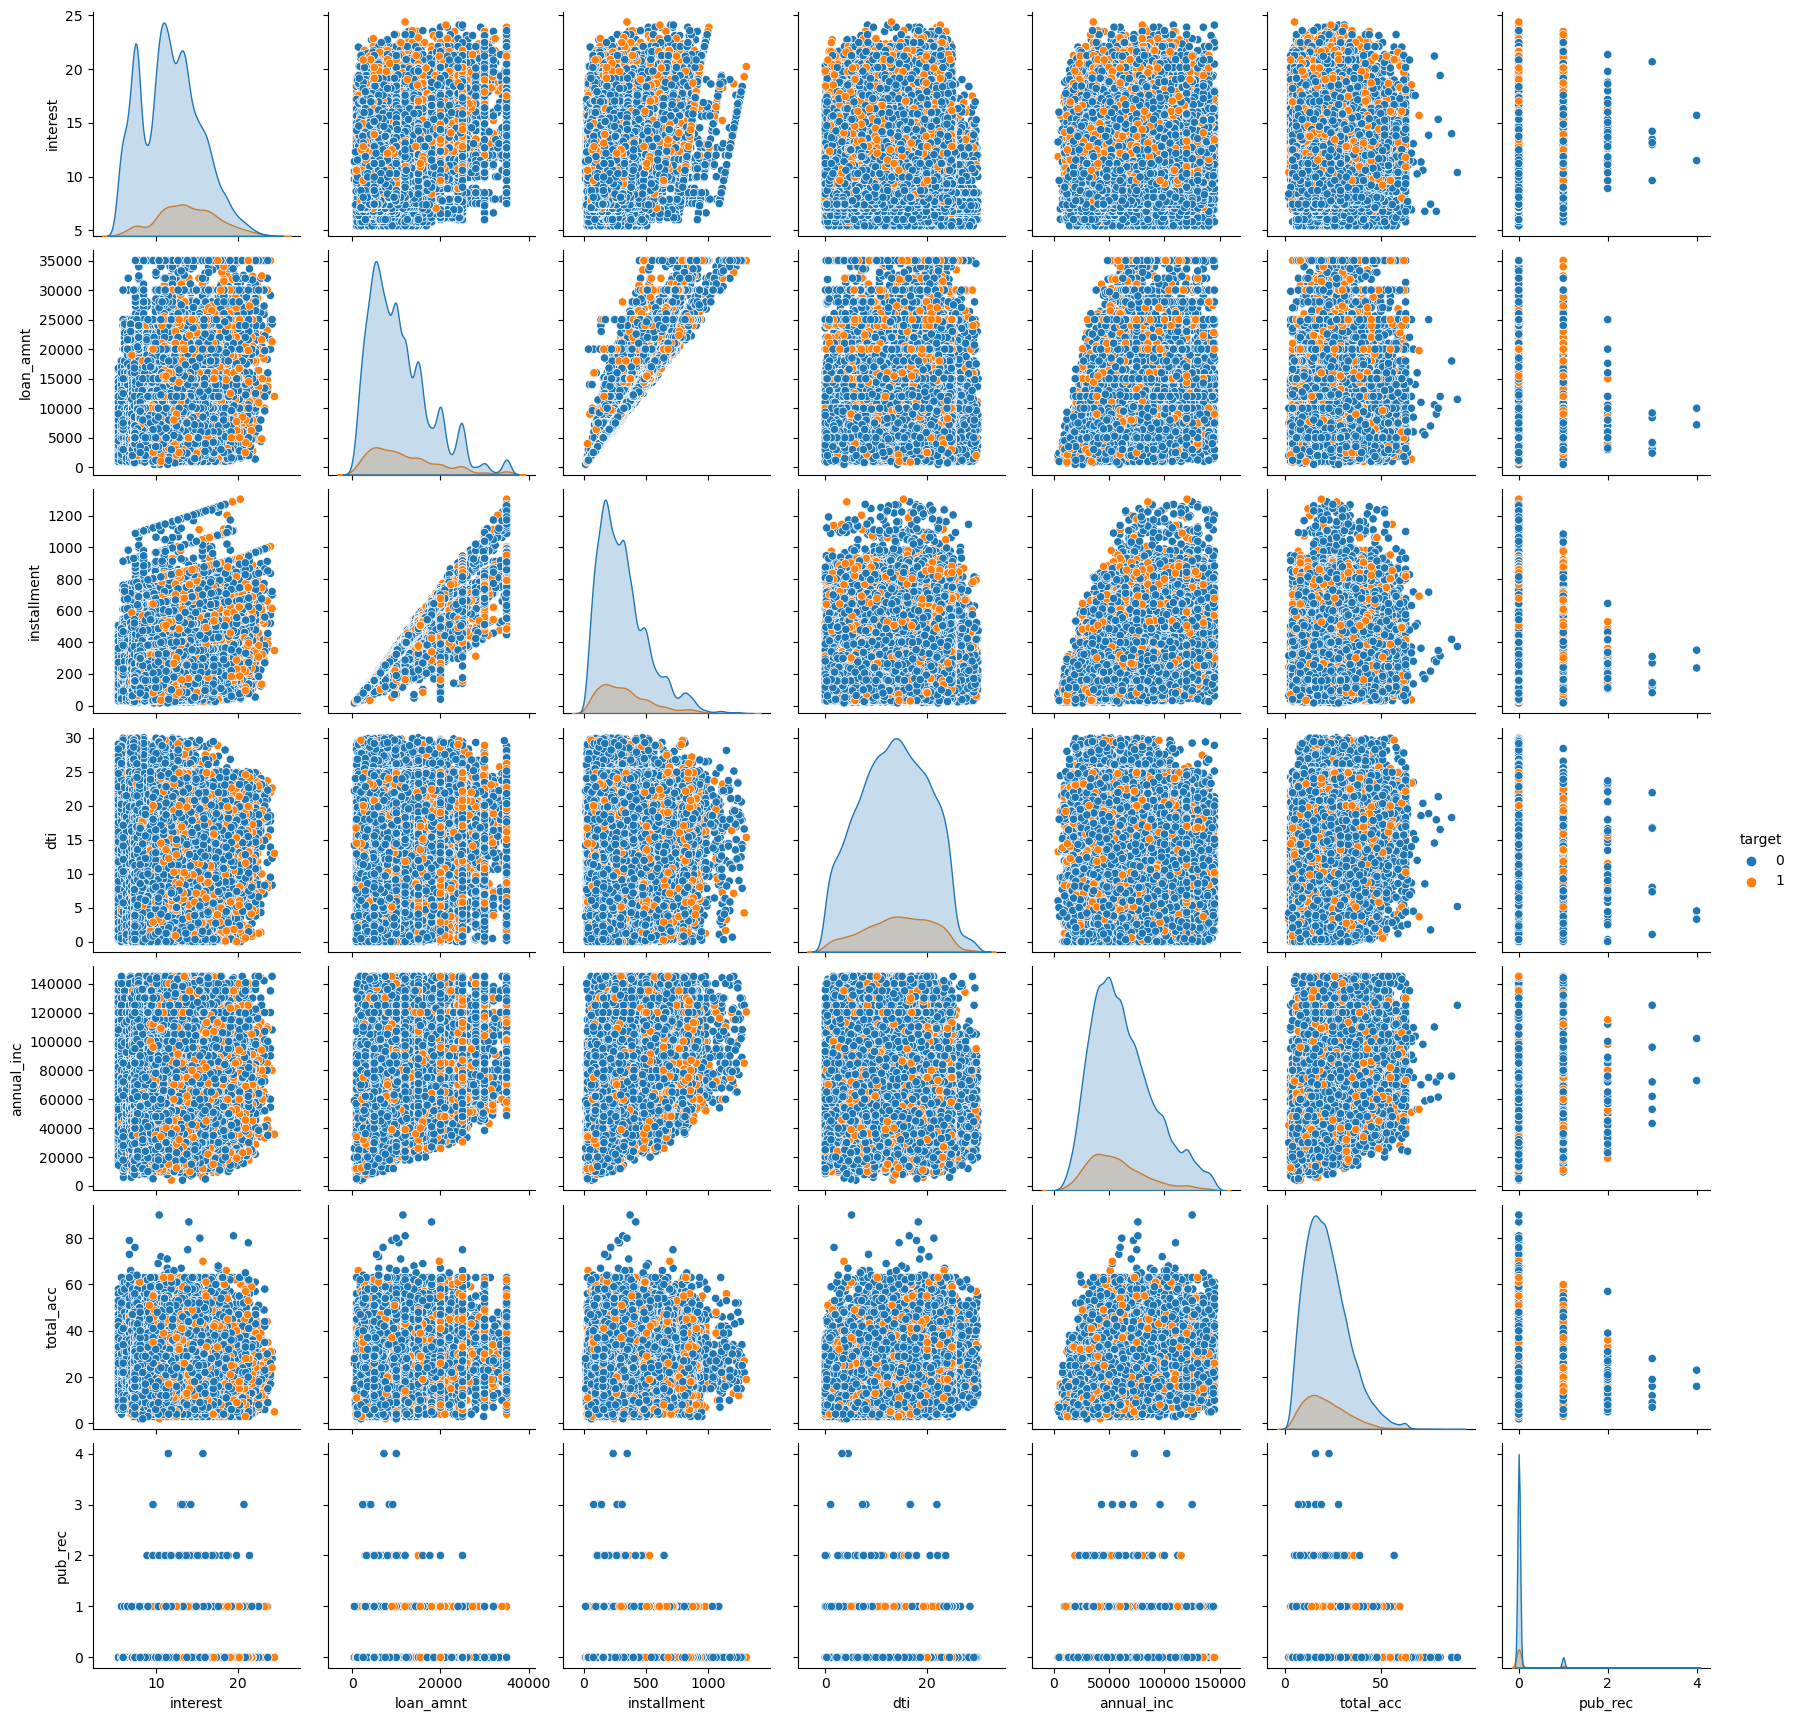

In [38]:
sns.pairplot(df_proper_sal[['interest', 'loan_amnt', 'installment', 'dti', 'annual_inc', 'total_acc', "pub_rec", "target"]], hue="target")
plt.show()

### 5.3.4 Heatmap for potentially correlated variables

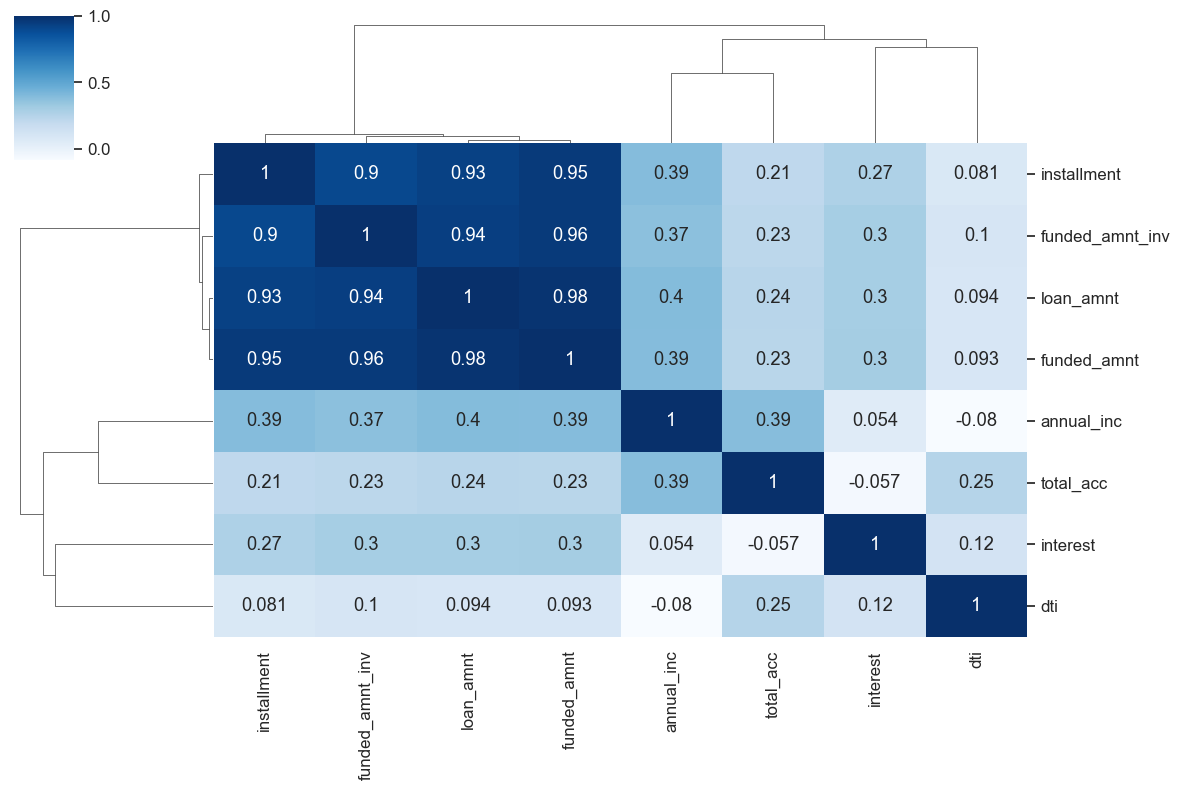

In [53]:
correlate = df_proper_sal[['interest', 'loan_amnt', 'installment', 'dti', 'annual_inc', 'total_acc', 'funded_amnt_inv', 'funded_amnt']].corr()
sns.set(font_scale=1.1)
sns.clustermap(correlate, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

### 5.3.6 Defaulters by State

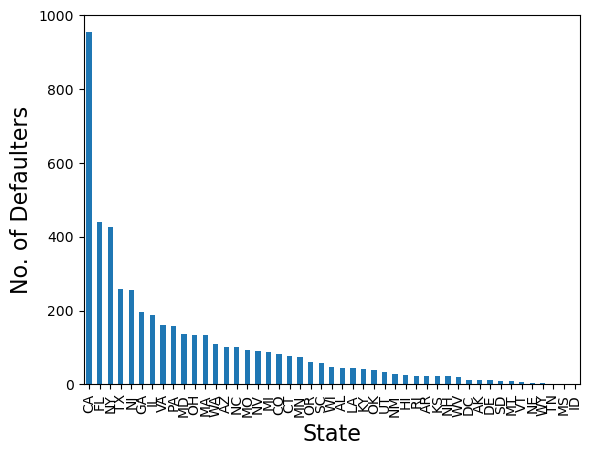

In [39]:
d_by_state = df_proper_sal[(df_proper_sal.target == 1)].groupby('addr_state').member_id.count().sort_values(ascending=False)
d_by_state.plot.bar()
plt.xlabel('State', fontsize=16)
plt.ylabel('No. of Defaulters', fontsize=16)
plt.show()

### 5.3.7 Payers by State

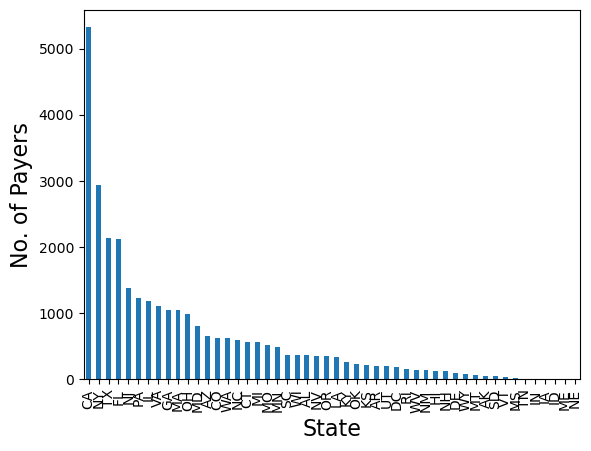

In [40]:
p_by_state = df_proper_sal[(df_proper_sal.target == 0)].groupby('addr_state').member_id.count().sort_values(ascending=False)
p_by_state.plot.bar()
plt.xlabel('State', fontsize=16)
plt.ylabel('No. of Payers', fontsize=16)
plt.show()

### 5.3.8 Type of Applications by Defaulters

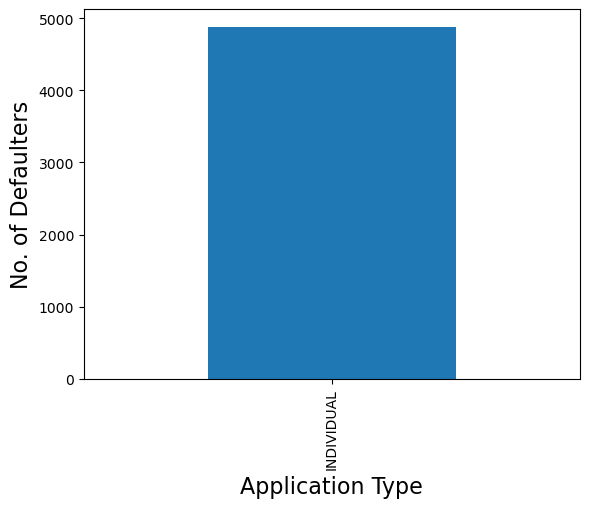

In [41]:
df_proper_sal[(df_proper_sal.target == 1)].groupby('application_type').member_id.count().plot.bar()
plt.xlabel('Application Type', fontsize=16)
plt.ylabel('No. of Defaulters', fontsize=16)
plt.show()

### 5.3.9 Distribution of Interest Rate

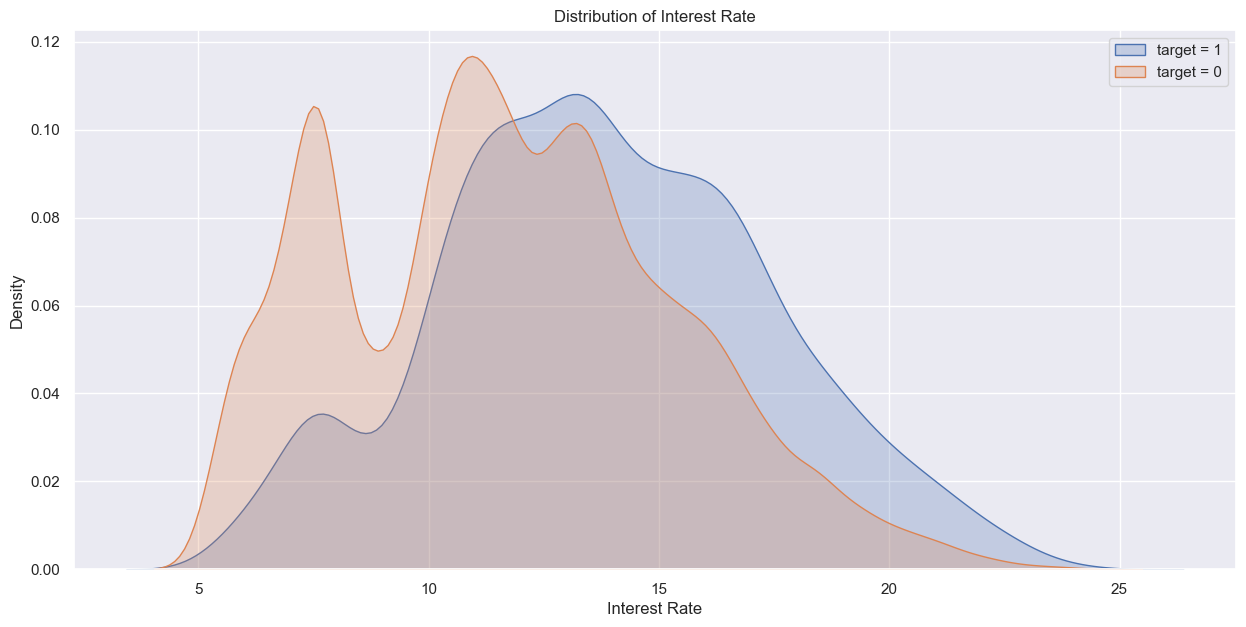

In [42]:
sns.set(rc={'figure.figsize':(15,7)})
sns.kdeplot(df_proper_sal.loc[df_proper_sal['target'] == 1, 'interest'], label = 'target = 1', shade=True)
sns.kdeplot(df_proper_sal.loc[df_proper_sal['target'] == 0, 'interest'], label = 'target = 0', shade=True);
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate');
plt.legend()

### 5.3.10 Which loan purpose is defaulted the most?

In [43]:
# Purpose for taking loans
p_loans = df_proper_sal.purpose.value_counts()
p_loans

purpose
debt_consolidation    17093
credit_card            4605
other                  3521
home_improvement       2475
major_purchase         1939
car                    1420
small_business         1366
wedding                 874
medical                 605
moving                  514
vacation                332
house                   322
educational             284
renewable_energy         81
Name: count, dtype: int64

In [44]:
# Defaulted loans by purpose
dp_loans = df_proper_sal[df_proper_sal.target == 1].purpose.value_counts()
dp_loans

purpose
debt_consolidation    2483
other                  538
credit_card            468
small_business         353
home_improvement       283
major_purchase         190
car                    150
medical                 94
wedding                 84
moving                  80
house                   49
vacation                48
educational             47
renewable_energy        14
Name: count, dtype: int64

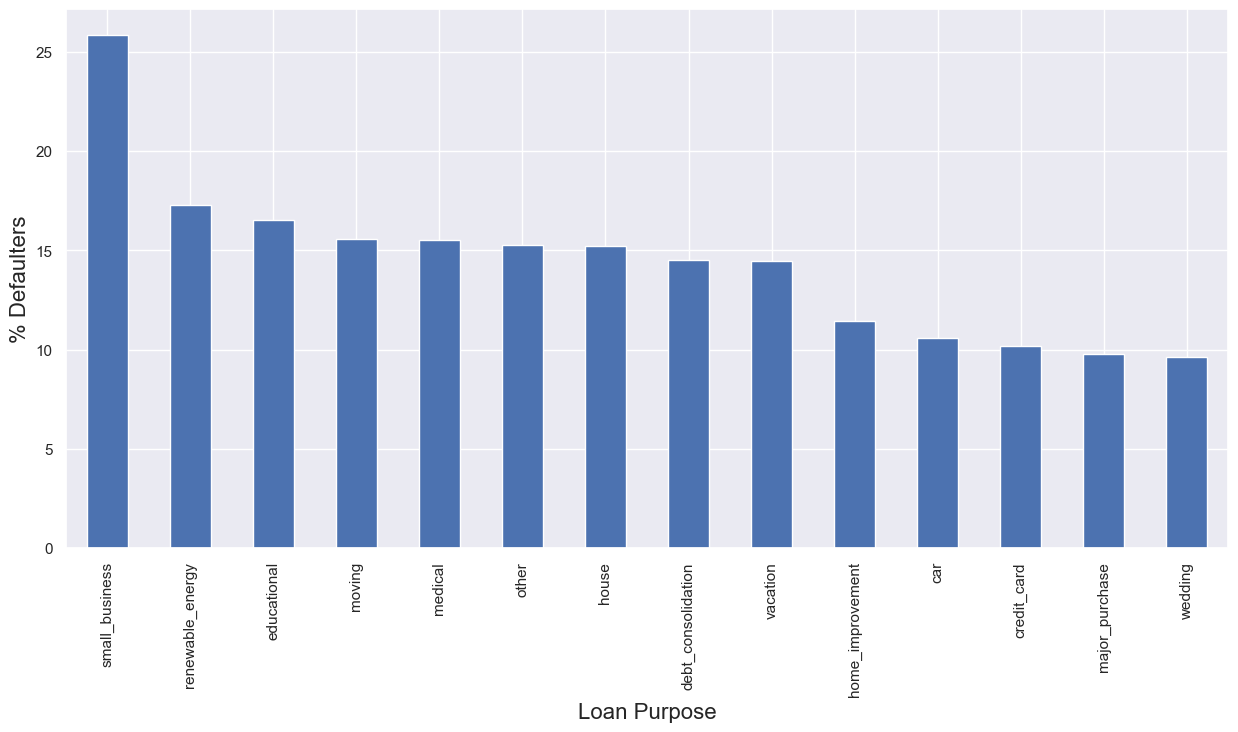

In [45]:
# Most defaulted by purpose

dflt_pct = dp_loans.div(p_loans)*100

dflt_pct.sort_values(ascending=False).plot.bar()
plt.xlabel('Loan Purpose', fontsize=16)
plt.ylabel('% Defaulters', fontsize=16)
plt.show()

### 5.3.11 Which loan terms were defaulted the most?

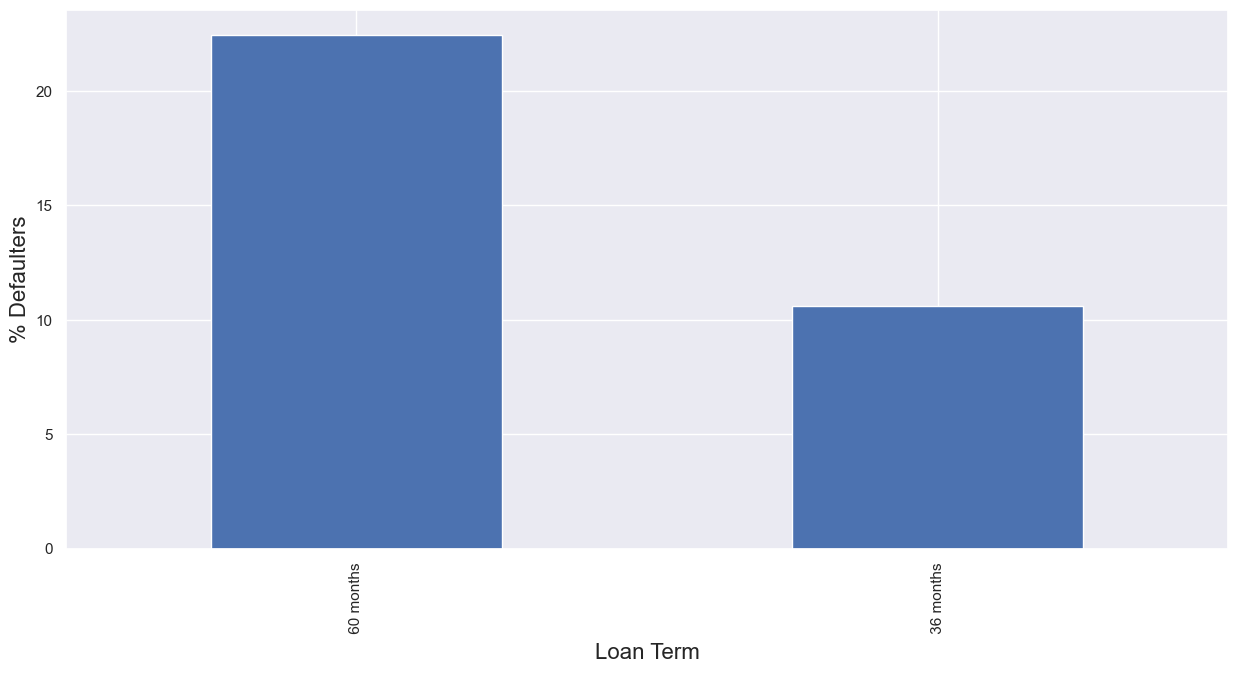

In [46]:
dl_by_term = df_proper_sal[df_proper_sal.target==1].term.value_counts()
l_by_term = df_proper_sal.term.value_counts()

ratio = dl_by_term.div(l_by_term)*100
ratio.sort_values(ascending=False).plot.bar()
plt.xlabel('Loan Term', fontsize=16)
plt.ylabel('% Defaulters', fontsize=16)
plt.show()

## 5.4 Derived Metrics

### 5.4.1 Most defaulted by Annual Income

In [47]:
df_final = df_proper_sal

In [48]:
df_final['income_bucket'] = df_final.annual_inc.apply(lambda x: "0-10k" if x<=10000 else ("11k-20k" if (x<=20000 and x>10000) else ("21k-30k" if (x<=30000 and x>20000) else ("31k-40k" if (x<=40000 and x>30000) else ("41k-50k" if (x<=50000 and x>40000) else ("51k-60k" if (x<=50000 and x>40000) else ("61k-70k" if (x<=70000 and x>60000) else ">70k")))))))

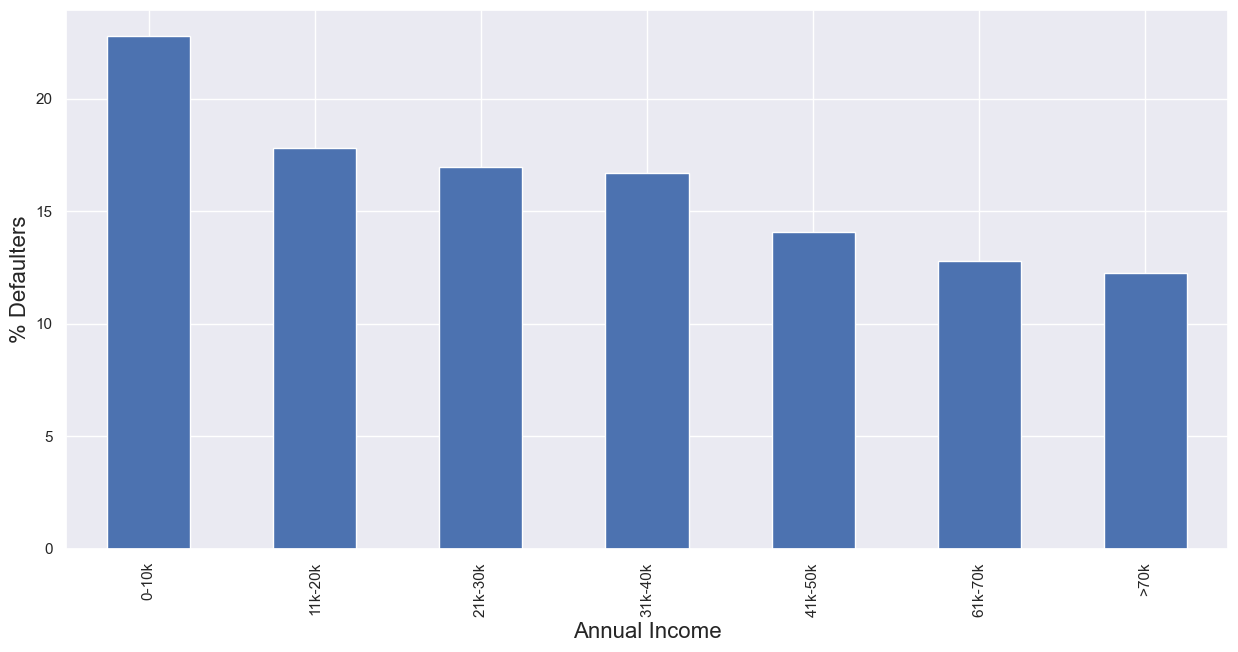

In [49]:
dl_by_income = df_final[df_final.target == 1].groupby('income_bucket').income_bucket.count().sort_values(ascending=False)
loans_by_income = df_final.groupby('income_bucket').income_bucket.count().sort_values(ascending=False)
pct_d_by_income = dl_by_income.div(loans_by_income)*100

pct_d_by_income.plot.bar()
plt.xlabel('Annual Income', fontsize=16)
plt.ylabel('% Defaulters', fontsize=16)
plt.show()